Домашнее задание по теме «AutoML алгоритмы для работы с данными»

    1. Классификация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    accuracy_score,  # Метрика точности для классификации
    mean_squared_error,  # Средняя квадратичная ошибка для регрессии
    r2_score,  # Коэффициент детерминации для регрессии
    classification_report  # Отчет о классификации
)
from flaml import AutoML

Загрузим данные

In [4]:
train_df=pd.read_csv('train_dataset.csv')

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.00,0.90,0.90,1,1,118,78,...,70,142,19.80,1,1.00,61,115,125,1,1
1,20,175,110,110.00,0.70,0.90,1,1,119,79,...,71,114,15.90,1,1.10,19,25,30,1,0
2,45,155,65,86.00,0.90,0.90,1,1,110,80,...,57,112,13.70,3,0.60,1090,1400,276,0,0
3,45,165,80,94.00,0.80,0.70,1,1,158,88,...,46,91,16.90,1,0.90,32,36,36,0,0
4,20,165,60,81.00,1.50,0.10,1,1,109,64,...,47,92,14.90,1,1.20,26,28,15,0,0


In [6]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

В датасете нет пропусков. 

Уменьшим вес датасета.

In [7]:
int_cols = train_df.select_dtypes('int').columns

float_cols = train_df.select_dtypes('float').columns
for col in int_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='integer')
for col in float_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='float')

In [8]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int8   
 1   height(cm)           38984 non-null  int16  
 2   weight(kg)           38984 non-null  int16  
 3   waist(cm)            38984 non-null  float32
 4   eyesight(left)       38984 non-null  float32
 5   eyesight(right)      38984 non-null  float32
 6   hearing(left)        38984 non-null  int8   
 7   hearing(right)       38984 non-null  int8   
 8   systolic             38984 non-null  int16  
 9   relaxation           38984 non-null  int16  
 10  fasting blood sugar  38984 non-null  int16  
 11  Cholesterol          38984 non-null  int16  
 12  triglyceride         38984 non-null  int16  
 13  HDL                  38984 non-null  int16  
 14  LDL                  38984 non-null  int16  
 15  hemoglobin           38984 non-null 

# EDA

In [7]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
age,0.00
height(cm),0.00
weight(kg),0.00
waist(cm),0.00
eyesight(left),0.00
eyesight(right),0.00
hearing(left),0.00
hearing(right),0.00
systolic,0.00
relaxation,0.00


In [8]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
age,85.00,20.00
height(cm),190.00,130.00
weight(kg),135.00,30.00
waist(cm),129.00,51.00
eyesight(left),9.90,0.10
eyesight(right),9.90,0.10
hearing(left),2.00,1.00
hearing(right),2.00,1.00
systolic,233.00,71.00
relaxation,146.00,40.00


In [9]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
age,44.13
height(cm),164.69
weight(kg),65.94
waist(cm),82.06
eyesight(left),1.01
eyesight(right),1.01
hearing(left),1.03
hearing(right),1.03
systolic,121.48
relaxation,75.99


In [10]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
age,40.00
height(cm),165.00
weight(kg),65.00
waist(cm),82.00
eyesight(left),1.00
eyesight(right),1.00
hearing(left),1.00
hearing(right),1.00
systolic,120.00
relaxation,76.00


In [11]:
#Находим дисперсию
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
age,145.53
height(cm),84.41
weight(kg),166.32
waist(cm),86.99
eyesight(left),0.25
eyesight(right),0.24
hearing(left),0.02
hearing(right),0.03
systolic,186.15
relaxation,93.29


In [12]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
age,30.00,60.00
height(cm),150.00,175.00
weight(kg),50.00,85.00
waist(cm),70.00,94.00
eyesight(left),0.60,1.50
eyesight(right),0.60,1.50
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,104.00,138.00
relaxation,64.00,88.00


In [13]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
age,40.00,55.00
height(cm),160.00,170.00
weight(kg),55.00,75.00
waist(cm),76.00,88.00
eyesight(left),0.80,1.20
eyesight(right),0.80,1.20
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,112.00,130.00
relaxation,70.00,82.00


# AutoML

In [9]:
my_random_state = 42

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df.drop('smoking', axis=1))
scaled_features = scaler.transform(train_df.drop('smoking', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = train_df.drop('smoking', axis=1).columns)

In [11]:
X_scaled = scaled_data
y = train_df['smoking']

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data_pca_scaled = pca.fit_transform(X_scaled)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data_pca_scaled, y, train_size=0.3, random_state = my_random_state)

In [14]:
X_train_df = pd.DataFrame(X_train, columns=['Признак 1', 'Признак 2'])
X_train_df

,Признак 1,Признак 2
0,0.32,-2.07
1,-2.86,0.36
2,0.51,-2.55
3,0.61,-1.61
4,1.16,0.33
...,...,...
11690,-1.98,-1.15
11691,1.57,1.76
11692,1.86,-0.15
11693,2.34,-0.72


In [15]:
X_test_df = pd.DataFrame(X_test, columns=['Признак 1', 'Признак 2'])
X_test_df

,Признак 1,Признак 2
0,1.45,-2.21
1,-0.26,-0.08
2,1.84,1.01
3,-2.47,-1.18
4,-0.07,-1.32
...,...,...
27284,-3.60,-0.30
27285,-2.95,-0.64
27286,-1.22,1.08
27287,-2.94,1.14


In [16]:
from flaml import AutoML

automl = AutoML()

parametrs = {
     "time_budget": 120,
     "metric": "accuracy",
     "task": "classification",
     "seed": my_random_state,
     "model_history" : True,
}

automl.fit(X_train=X_train_df, y_train=y_train,**parametrs)

[flaml.automl.logger: 04-06 15:49:44] {1728} INFO - task = classification
[flaml.automl.logger: 04-06 15:49:44] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 04-06 15:49:44] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-06 15:49:44] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']


[flaml.automl.logger: 04-06 15:49:44] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-06 15:49:45] {2393} INFO - Estimated sufficient time budget=1669s. Estimated necessary time budget=39s.
[flaml.automl.logger: 04-06 15:49:45] {2442} INFO -  at 0.2s,	estimator lgbm's best error=0.3663,	best estimator lgbm's best error=0.3663
[flaml.automl.logger: 04-06 15:49:45] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-06 15:49:45] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.3663,	best estimator lgbm's best error=0.3663
[flaml.automl.logger: 04-06 15:49:45] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-06 15:49:45] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.3663,	best estimator lgbm's best error=0.3663
[flaml.automl.logger: 04-06 15:49:45] {2258} INFO - iteration 3, current learner sgd
[flaml.automl.logger: 04-06 15:49:45] {2442} INFO -  at 0.6s,	estimator sgd's best error=0.3168,	best estimator sg

In [17]:
print("Лучшая модель: ",automl.best_estimator)
print("Гиперпараметры лучшнй модели: ",automl.best_config)
print('Лучшая точность на тренировочной выборке: {0:.4g}'.format(1-automl.best_loss))

Лучшая модель:  extra_tree
Гиперпараметры лучшнй модели:  {'n_estimators': 75, 'max_features': np.float64(0.652074166779097), 'max_leaves': 676, 'criterion': np.str_('entropy')}
Лучшая точность на тренировочной выборке: 0.6981


In [18]:
automl.model.estimator

ExtraTreesClassifier(criterion=np.str_('entropy'),
                     max_features=np.float64(0.652074166779097),
                     max_leaf_nodes=676, n_estimators=75, n_jobs=-1,
                     random_state=12032022)

<BarContainer object of 2 artists>

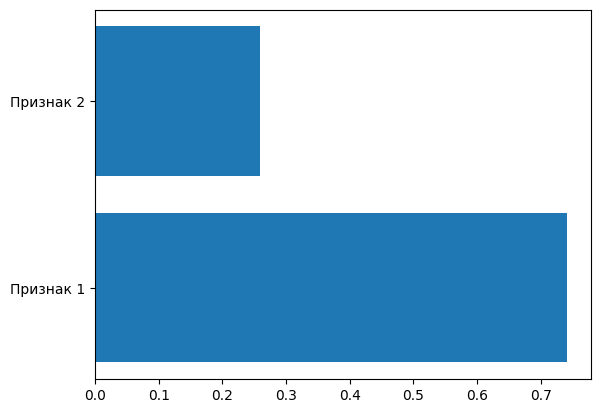

In [19]:
import matplotlib.pyplot as plt
plt.barh(automl.model.estimator.feature_names_in_, automl.model.estimator.feature_importances_)

In [20]:
automl.best_loss_per_estimator

{'lgbm': 0.3098760153911928,
 'rf': 0.31406584010260796,
 'xgboost': 0.3092774690038478,
 'extra_tree': 0.3019238991021804,
 'xgb_limitdepth': 0.3108165882855921,
 'sgd': 0.315262932877298,
 'lrl1': 0.32270200940572896}

Посмотрим качественные оценки всех моделей AutoML

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
estimator_dict = {}
for estimator in automl.estimator_list:
    y_pred = automl.best_model_for_estimator(estimator).estimator.predict(X_test)
    estimator_dict[estimator] = {'f1': f1_score(y_pred, y_test), 
                                 'accuracy': accuracy_score(y_pred, y_test),
                                 'precision_score':precision_score(y_pred, y_test),
                                 'recall_score':recall_score(y_pred, y_test),
                                   }
estimator_df = pd.DataFrame(estimator_dict)
estimator_df

c:\Users\Пользователь\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Пользователь\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Пользователь\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\Users\Пользователь\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,lgbm,rf,xgboost,extra_tree,xgb_limitdepth,sgd,lrl1
f1,0.58,0.58,0.58,0.59,0.58,0.59,0.50
accuracy,0.69,0.69,0.69,0.70,0.69,0.69,0.68
precision_score,0.57,0.59,0.59,0.59,0.58,0.61,0.44
recall_score,0.58,0.57,0.57,0.59,0.57,0.57,0.58


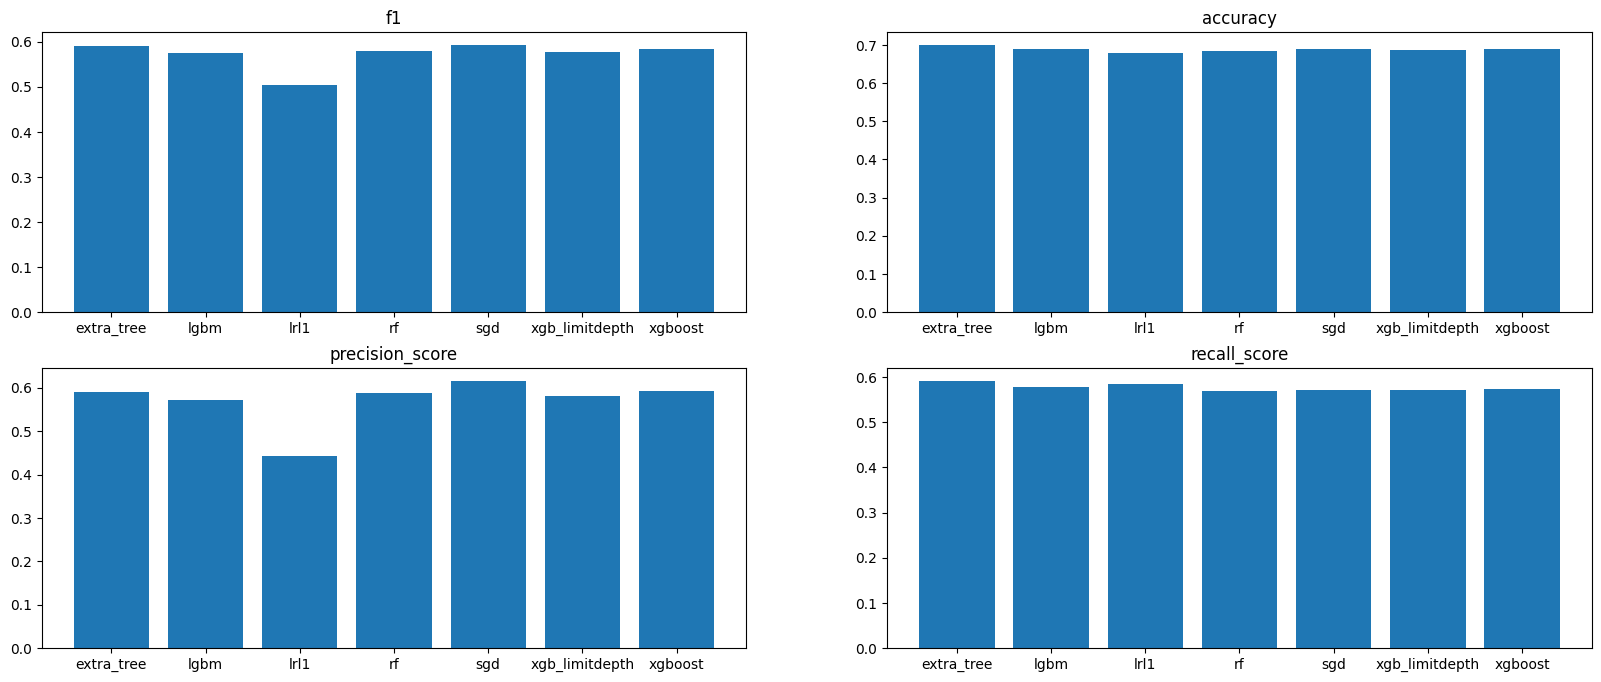

In [22]:
i = 1
plt.figure(figsize=[20, 8])
for score in estimator_df.index:
    plt.subplot(2, 2, i)
    i +=1
    myList = sorted(estimator_df.loc[score].items())
    x, y = zip(*myList)
    plt.bar(x, y)
    plt.title(score)
plt.show()

Лучшие гиперпараметры для всех моделей.

In [23]:
pd.DataFrame(automl.best_config_per_estimator).T

,n_estimators,num_leaves,min_child_samples,learning_rate,log_max_bin,colsample_bytree,reg_alpha,reg_lambda,max_features,max_leaves,...,max_depth,penalty,alpha,l1_ratio,epsilon,eta0,power_t,average,loss,C
lgbm,11.00,26.00,7.00,0.22,6.00,0.99,0.01,1.96,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rf,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xgboost,25.00,NaN,NaN,0.12,NaN,1.00,0.00,40.47,NaN,16.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extra_tree,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xgb_limitdepth,17.00,NaN,NaN,0.67,NaN,1.00,0.00,15.33,NaN,NaN,...,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sgd,NaN,NaN,NaN,invscaling,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,l2,0.00,1.00,0.02,0.01,0.61,False,log_loss,NaN
lrl1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19


Сохраним модель

In [24]:
from joblib import dump

dump(automl.model, 'automl.joblib')

['automl.joblib']

Сравним результат работы AutoML с обычной моделью ExtraTreesClassifier

# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extratree_clf = ExtraTreesClassifier()
extratree_clf.fit(X_train, y_train)
y_pred = extratree_clf.predict(X_test)
estimator_dict["ExtraTreesClassifier w/o AutoMl"] = {'f1': f1_score(y_pred, y_test), 
                                 'accuracy': accuracy_score(y_pred, y_test),
                                 'precision_score':precision_score(y_pred, y_test),
                                 'recall_score':recall_score(y_pred, y_test),
                                   }
estimator_df = pd.DataFrame(estimator_dict)
estimator_df

,lgbm,rf,xgboost,extra_tree,xgb_limitdepth,sgd,lrl1,ExtraTreesClassifier w/o AutoMl
f1,0.58,0.58,0.58,0.59,0.58,0.59,0.50,0.56
accuracy,0.69,0.69,0.69,0.70,0.69,0.69,0.68,0.69
precision_score,0.57,0.59,0.59,0.59,0.58,0.61,0.44,0.55
recall_score,0.58,0.57,0.57,0.59,0.57,0.57,0.58,0.58


ExtraTreesClassifier без AutoML mпоказал себя хуже. 